In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform



Insert the data

In [15]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target
y = y.astype(int)  # convert y from strings to integers



## PCA

In [16]:
# PCA projection to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [17]:
# Fit K-Means clustering with 10 clusters (one per digit)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)



KMeans(n_clusters=10, random_state=42)

In [18]:
# Compute accuracy
y_pred = kmeans.predict(X_pca)
acc = accuracy_score(y, y_pred)

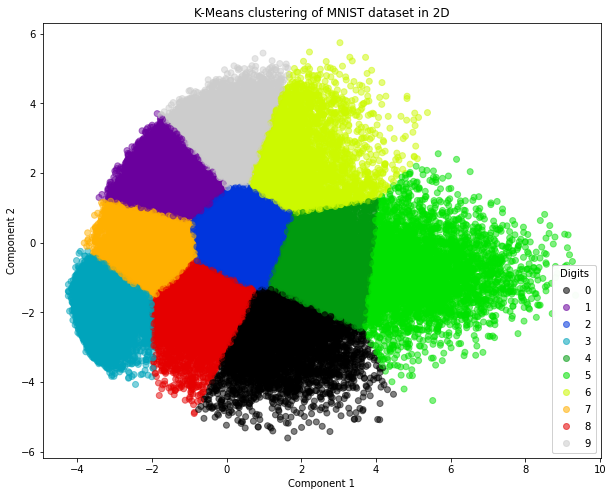

Accuracy: 0.12021428571428572
Confusion matrix:
[[ 159    8  511    2 2430 3577  155   28   28    5]
 [   0    6   20 6663    1    0    0 1055  132    0]
 [1018  205 1646  165 1336  145   71  605 1764   35]
 [2533  116  737   83  382   59   16  678 2521   16]
 [   0 2288  240   19   14    4 1249  583    3 2424]
 [ 809  328 1779   57 1082  133  176 1137  698  114]
 [ 118  158 2448  107 1425  176  885  732  731   96]
 [   0 3134  205   91    3    0  428  838   27 2567]
 [ 419  185 1879  184  715  122  166  961 2106   88]
 [   6 2610  217   33   52   28  774  680   13 2545]]


In [19]:
# Plot clustering results
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=plt.cm.get_cmap('nipy_spectral', 10), alpha=0.5)
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Digits")
ax.add_artist(legend)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.title('K-Means clustering of MNIST dataset in 2D with PCA')
plt.show()

# Print accuracy and confusion matrix
print(f"Accuracy: {acc}")


## MDS

In [37]:


dist = pdist(X)

# Perform MDS on the distance matrix to reduce it to 2 dimensions
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
X_mds = mds.fit_transform(squareform(dist))

# Fit K-Means clustering with 10 clusters (one per digit)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_mds)

# Compute accuracy 
y_pred = kmeans.predict(X_mds)
acc = accuracy_score(y, y_pred)

# Plot clustering results
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_mds[:, 0], X_mds[:, 1], c=y_pred, cmap=plt.cm.get_cmap('nipy_spectral', 10), alpha=0.5)
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Digits")
ax.add_artist(legend)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.title('MDS and K-Means clustering of MNIST dataset in 2D')
plt.show()

# Print accuracy 
print(f"Accuracy: {acc}")

NameError: name 'D' is not defined

## tSNE

In [26]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(mnist.data)


/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


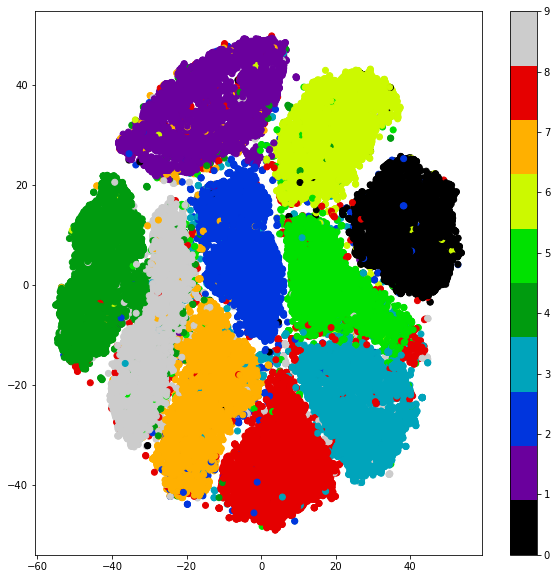

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=mnist.target.astype(int), cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()


In [28]:
# Fit K-Means clustering with 10 clusters (one per digit)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_tsne)

# Compute accuracy and confusion matrix
y_pred = kmeans.predict(X_tsne)
acc = accuracy_score(y, y_pred)


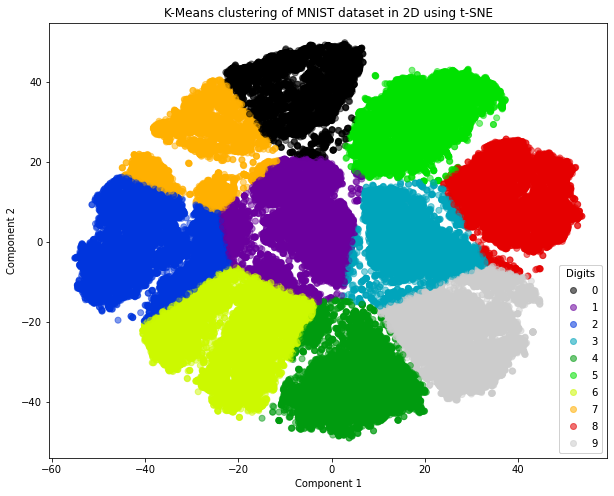

In [29]:
# Plot clustering results
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap=plt.cm.get_cmap('nipy_spectral', 10), alpha=0.5)
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Digits")
ax.add_artist(legend)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.title('K-Means clustering of MNIST dataset in 2D using t-SNE')
plt.show()

In [30]:
# Print accuracy and confusion matrix
print(f"Accuracy: {acc}")

Accuracy: 0.007785714285714286
